성공: 히트맵이 correlation_heatmap.png 파일로 저장되었습니다.


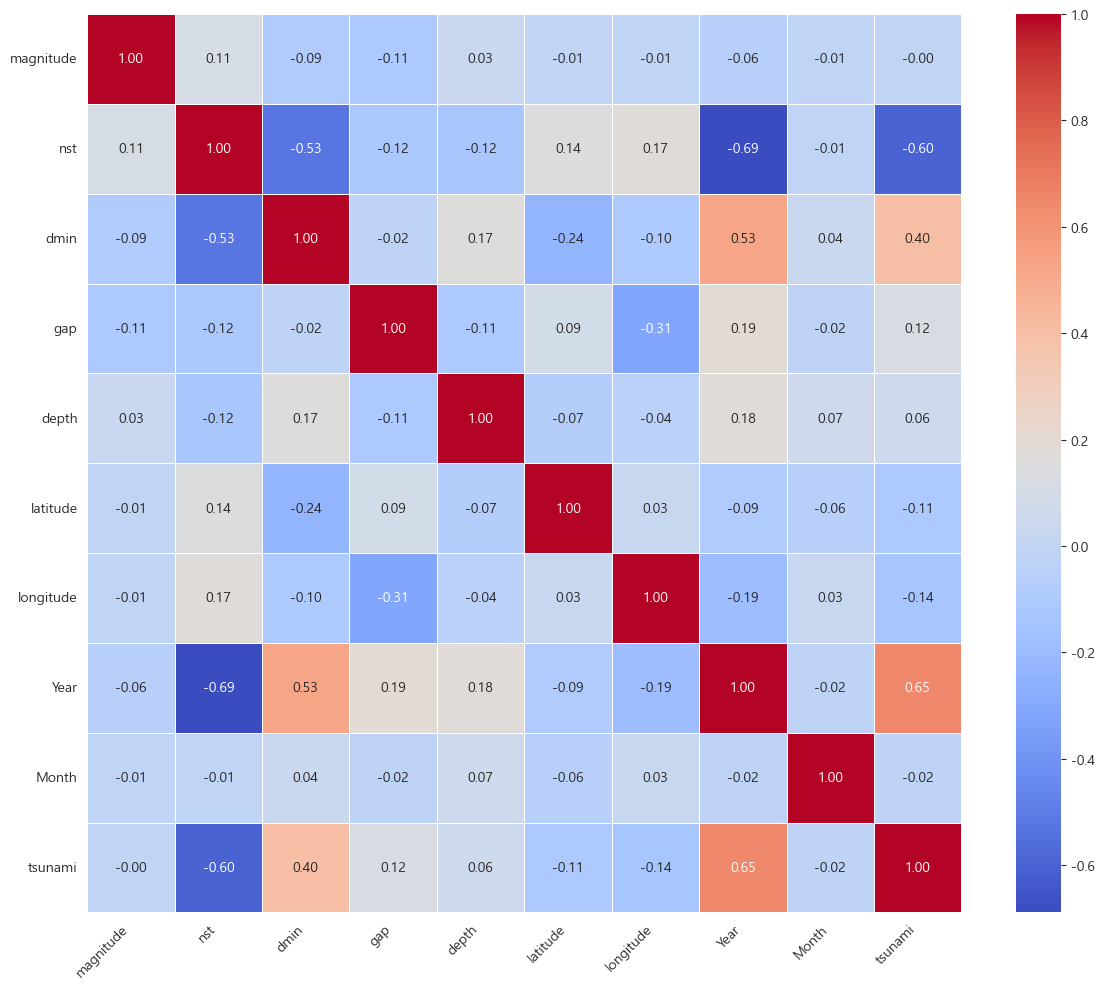

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def create_heatmap(csv_file_path):
    """
    CSV 파일을 읽어 수치형 데이터의 상관관계 히트맵을 생성하고
    png 파일로 저장한 뒤, 화면에 플롯을 띄웁니다.
    """
    try:
        # 1. 데이터 로드
        df = pd.read_csv(csv_file_path)

        # 2. 수치형(Numeric) 데이터만 선택
        numeric_df = df.select_dtypes(include=[np.number])

        if numeric_df.empty:
            print(f"오류: '{csv_file_path}' 파일에 수치형 데이터가 없습니다.")
            return

        # 3. 상관관계 행렬 계산
        corr_matrix = numeric_df.corr()

        # 4. 히트맵 시각화

        # ⭐️⭐️⭐️ 한글 깨짐 방지 설정 ⭐️⭐️⭐️
        # 윈도우 사용자: 'Malgun Gothic'
        # 맥 사용자: 'AppleGothic'
        try:
            plt.rc('font', family='Malgun Gothic')
        except:
            try:
                plt.rc('font', family='AppleGothic')
            except:
                print("한글 폰트(맑은 고딕 또는 AppleGothic)를 찾을 수 없습니다. 그래프의 한글이 깨질 수 있습니다.")

        plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지
        # ⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️⭐️

        plt.figure(figsize=(12, 10))
        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5
        )

        # (만약 열 이름이 아닌 그래프 제목만 한글로 하려면)
        # plt.title('상관관계 히트맵 (Correlation Heatmap)', fontsize=16)

        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()

        # 5. 이미지 파일로 저장
        output_image_file = "correlation_heatmap.png"
        plt.savefig(output_image_file)
        print(f"성공: 히트맵이 {output_image_file} 파일로 저장되었습니다.")

        # 6. PyCharm에서 그래프 창 띄우기
        plt.show()

    except FileNotFoundError:
        print(f"오류: 파일을 찾을 수 없습니다. '{csv_file_path}' 경로를 확인하세요.")
    except Exception as e:
        print(f"알 수 없는 오류가 발생했습니다: {e}")

# --- 스크립트 실행 ---
if __name__ == "__main__":
    # 실행할 CSV 파일 이름 (스크립트와 같은 폴더에 있어야 함)
    file_to_process = 'train_data.csv'
    create_heatmap(file_to_process)

성공: 그래프가 tsunami_count_vs_magnitude_lineplot.png 파일로 저장되었습니다.


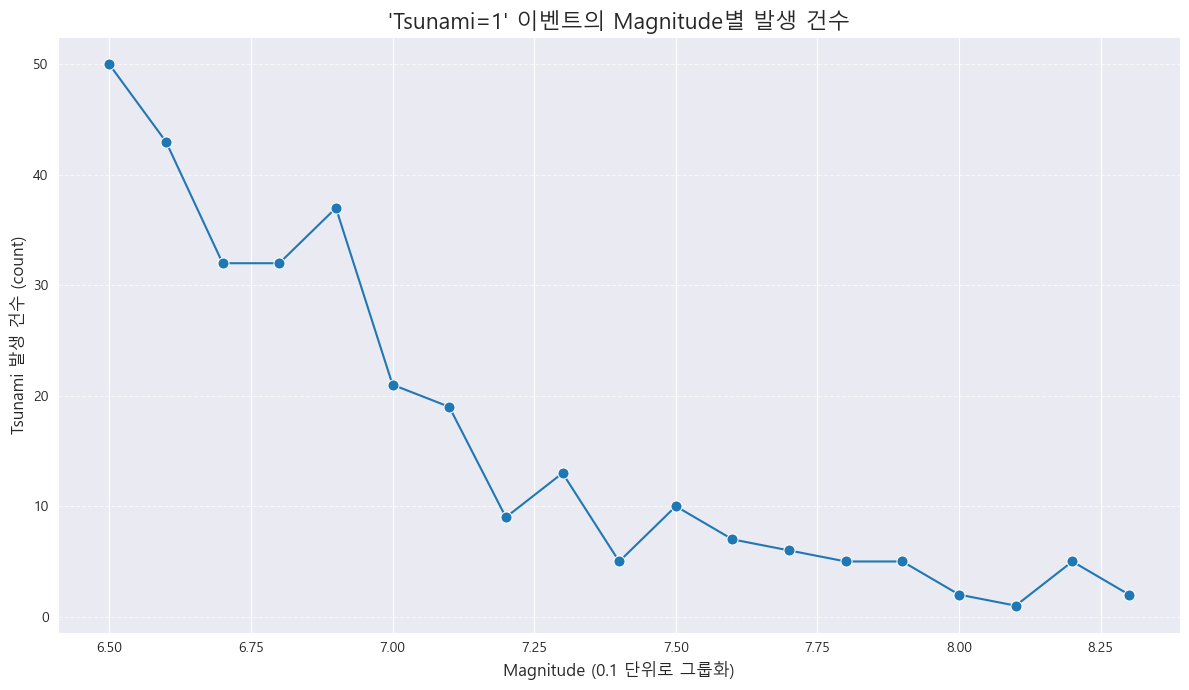

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

def plot_tsunami_count_by_magnitude(csv_file_path):
    """
    CSV 파일을 읽어 'tsunami'=1인 데이터만 필터링한 뒤,
    'magnitude' 크기별로 발생 건수를 집계하여 선 그래프를 그립니다.
    """
    try:
        # 1. 데이터 로드
        df = pd.read_csv(csv_file_path)

        # 2. 'tsunami'가 1인 데이터만 필터링
        tsunami_df = df[df['tsunami'] == 1].copy()

        if tsunami_df.empty:
            print(f"오류: '{csv_file_path}' 파일에 'tsunami'가 1인 데이터가 없습니다.")
            return

        # 3. 'magnitude'를 0.1 단위로 그룹화(반올림)
        #    'magnitude' 크기별로 발생 건수(count) 집계
        tsunami_df['mag_rounded'] = tsunami_df['magnitude'].round(1)

        # 'mag_rounded' 값으로 그룹화하고, 각 그룹의 데이터 개수(size)를 셉니다.
        # .reset_index(name='count')는 집계된 Series를 'mag_rounded' | 'count' 컬럼을 가진 DataFrame으로 변환
        mag_counts = tsunami_df.groupby('mag_rounded').size().reset_index(name='count')

        # 'magnitude' 크기 순으로 정렬 (groupby가 보통 자동으로 하지만, 명확성을 위해)
        mag_counts = mag_counts.sort_values('mag_rounded')

        # 4. 시각화 (한글 폰트 설정)
        try:
            plt.rc('font', family='Malgun Gothic') # Windows
        except:
            try:
                plt.rc('font', family='AppleGothic') # macOS
            except:
                print("한글 폰트(맑은 고딕 또는 AppleGothic)를 찾을 수 없습니다. 그래프의 한글이 깨질 수 있습니다.")

        plt.rc('axes', unicode_minus=False) # 마이너스 기호 깨짐 방지

        # 5. 선 그래프 생성
        plt.figure(figsize=(12, 7))
        line_plot = sns.lineplot(
            data=mag_counts,
            x='mag_rounded',  # X축: 그룹화된 magnitude
            y='count',        # Y축: 발생 건수
            marker='o',       # 각 데이터 지점에 점 표시
            markersize=8
        )

        plt.title("'Tsunami=1' 이벤트의 Magnitude별 발생 건수", fontsize=16)
        plt.xlabel("Magnitude (0.1 단위로 그룹화)", fontsize=12)
        plt.ylabel("Tsunami 발생 건수 (count)", fontsize=12)

        plt.grid(axis='y', linestyle='--', alpha=0.7) # y축 그리드
        plt.tight_layout()

        # 6. 파일 저장 및 화면 표시
        output_image_file = "tsunami_count_vs_magnitude_lineplot.png"
        plt.savefig(output_image_file)
        print(f"성공: 그래프가 {output_image_file} 파일로 저장되었습니다.")

        plt.show()

    except FileNotFoundError:
        print(f"오류: 파일을 찾을 수 없습니다. '{csv_file_path}' 경로를 확인하세요.")
    except Exception as e:
        print(f"알 수 없는 오류가 발생했습니다: {e}")

# --- 스크립트 실행 ---
if __name__ == "__main__":
    # 'train_data.csv' 파일이 스크립트와 같은 폴더에 있어야 함
    file_to_process = 'train_data.csv'
    plot_tsunami_count_by_magnitude(file_to_process)